#In Colab
- Mount google drive
- Change working directory to directory that store the train.csv and test.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd "drive/MyDrive/Comp4211/PA1"

Mounted at /content/drive
/content/drive/MyDrive/Comp4211/PA1


#Import package

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error

#Import Data
Please fun the following code

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train_numerical = train.select_dtypes(include= np.number)
train_categorical = train.copy().drop(columns = train_numerical.columns)

##Part 1


In [ ]:
train_categorical.columns

Index(['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C15', 'classification target'],
      dtype='object')

###Q1

In [ ]:
#Size of the Dataset
train.info()
#test.info()

#In short Dtype = object is categorical value
#Dtype = int or float is numerical value

train.select_dtypes(include= np.number).info()
# 17 numerical features
# 33-18-1 = 14 categorical features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   C0                     3510 non-null   object 
 1   C1                     3539 non-null   object 
 2   C2                     3539 non-null   object 
 3   C3                     3539 non-null   object 
 4   C4                     3490 non-null   object 
 5   C5                     3431 non-null   object 
 6   C6                     3539 non-null   float64
 7   C7                     3539 non-null   object 
 8   C8                     3457 non-null   object 
 9   C9                     3397 non-null   object 
 10  C10                    3539 non-null   object 
 11  C11                    3381 non-null   object 
 12  C12                    3369 non-null   object 
 13  C13                    3419 non-null   object 
 14  C14                    3539 non-null   int64  
 15  C15 

###Q2 : Find missing and proportion of missing value(That is how many)

In [ ]:
train.isnull().sum() #This function takes a scalar or array-like object and indicates whether values are missing (NaN in numeric arrays, None or NaN in object arrays, NaT in datetimelike).

C0                        29
C1                         0
C2                         0
C3                         0
C4                        49
C5                       108
C6                         0
C7                         0
C8                        82
C9                       142
C10                        0
C11                      158
C12                      170
C13                      120
C14                        0
C15                      138
C16                        0
C17                      148
C18                        0
C19                        0
C20                      171
C21                        0
C22                       16
C23                       28
C24                        0
C25                      144
C26                        0
C27                        0
C28                        0
C29                      160
C30                        0
regression target          0
classification target      0
dtype: int64

###Q3 : Feature Distribution

In [ ]:
train_numerical = train.select_dtypes(include= np.number)

#train_numerical.info()
#train_numerical.head()

#train_numerical.select_dtypes(include ="int64").info()
#train_numerical.select_dtypes(include ="float64").info()

Discrete_col= train_numerical.select_dtypes(include ="int64").columns
Continuous_col= train_numerical.select_dtypes(include ="float64").columns

print(list(train_numerical.select_dtypes(include ="int64").columns), list(train_numerical.select_dtypes(include ="float64").columns)[0:-1]) # List of names

#I Assume float to continuous then and int to be discrete

['C14', 'C16', 'C18', 'C19', 'C21', 'C24', 'C27'] ['C6', 'C17', 'C20', 'C22', 'C23', 'C25', 'C26', 'C28', 'C29', 'C30']


In [ ]:
#Find distribution
train_numerical[train_numerical.columns[0:3]].describe()

,C6,C14,C16
count,3539.000000,3539.000000,3539.000000
mean,66.324696,23.204012,0.683526
std,6.619953,7.427675,2.275012
min,47.500000,17.000000,0.000000
25%,62.500000,19.000000,0.000000
50%,66.550000,20.000000,0.000000
75%,70.000000,25.000000,0.000000
max,95.000000,70.000000,20.000000


In [ ]:
#Still need variance
train_numerical[train_numerical.columns[0:3]].var()

C6     43.823775
C14    55.170351
C16     5.175678
dtype: float64

Text(0.5, 1.0, 'Third Numerical Column box plot')

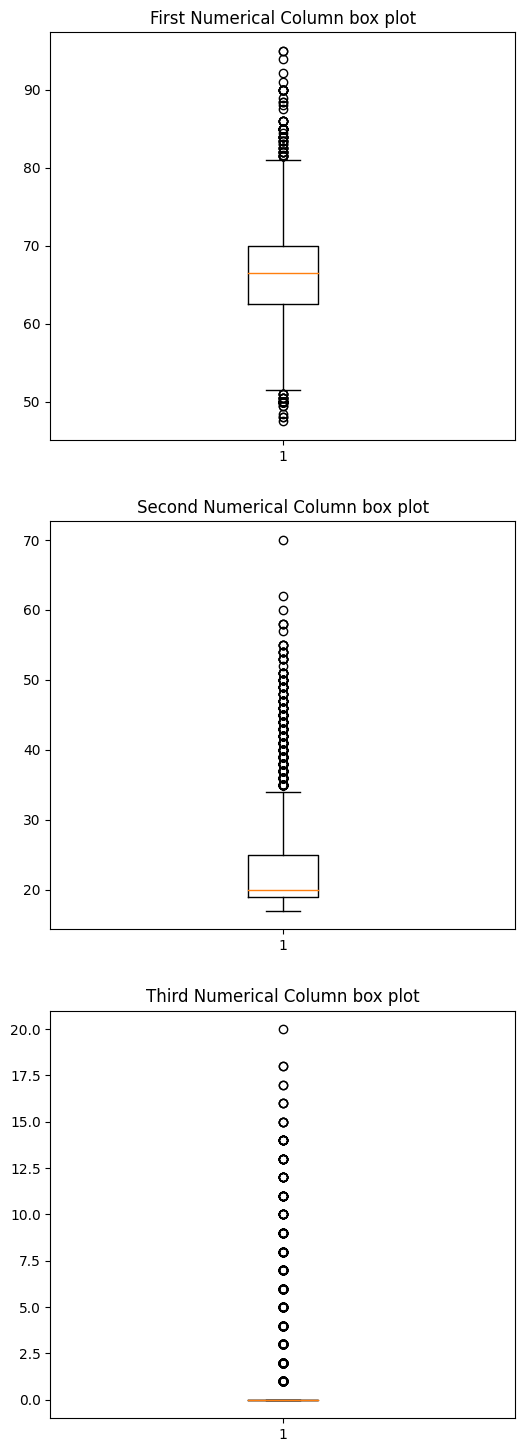

In [ ]:
#Plot box plot

fig, ax = plt.subplots(3,1,figsize=(6, 18))
ax[0].boxplot(train_numerical[train_numerical.columns[0]].to_numpy())
ax[0].set_title("First Numerical Column box plot")
ax[1].boxplot(train_numerical[train_numerical.columns[1]].to_numpy())
ax[1].set_title("Second Numerical Column box plot")
ax[2].boxplot(train_numerical[train_numerical.columns[2]].to_numpy())
ax[2].set_title("Third Numerical Column box plot")

In [ ]:
train_categorical = train.copy().drop(columns = train_numerical.columns)

train_categorical


# Nominal: the data can only be categorized. Ordinal: the data can be categorized and ranked.
# Nominal: C0, C1(?), C3, C4, C7, C12,
# Ordinal: C2, C5,
# Binary: C8, C9, C10, C11, C13, C15
uniqueValues = train_categorical.nunique()
print(uniqueValues)

C0                        6
C1                       18
C2                        8
C3                       17
C4                        2
C5                       17
C7                       19
C8                        2
C9                        2
C10                       2
C11                       2
C12                       2
C13                       2
C15                       2
classification target     2
dtype: int64


{'single': 3115, 'married': 296, 'divorced': 75, 'facto union': 18, 'legally separated': 3, 'widower': 3}
dict_keys(['single', 'married', 'divorced', 'facto union', 'legally separated', 'widower'])
dict_values([3115, 296, 75, 18, 3, 3])


Text(0.5, 1.0, 'First Categorical Column box plot')

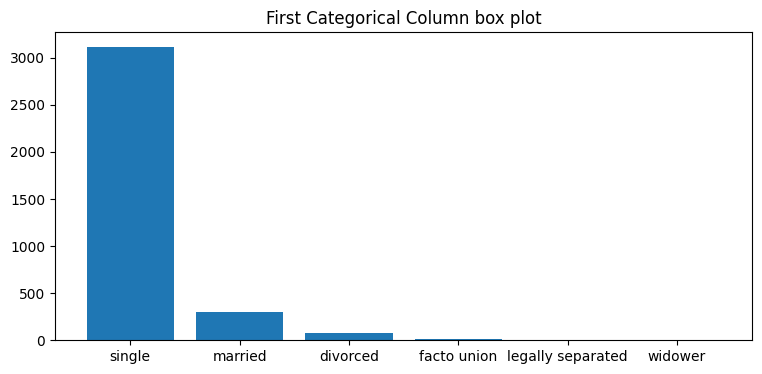

In [ ]:
train_categorical["C0"].value_counts()
print(train_categorical["C0"].value_counts().to_dict())
print(train_categorical["C0"].value_counts().to_dict().keys())
print(train_categorical["C0"].value_counts().to_dict().values())

fig, ax = plt.subplots(figsize=(9,4))
ax.bar(train_categorical["C0"].value_counts().to_dict().keys(),train_categorical["C0"].value_counts().to_dict().values())
ax.set_title("First Categorical Column box plot")

['1st phase - general contingent', '2nd phase - general contingent', 'Over 23 years old', 'Change of course', 'Technological specialization diploma holders', 'Holders of other higher courses', '3rd phase - general contingent', 'Transfer', 'Change of institution/course', 'Short cycle diploma holders', '1st phase - special contingent (Madeira Island)', 'International student (bachelor)', '1st phase - special contingent (Azores Island)', 'Ordinance No. 854-B/99', 'Ordinance No. 612/93', 'Ordinance No. 533-A/99, item b3 (Other Institution)', 'Ordinance No. 533-A/99, item b2) (Different Plan)', 'Change of institution/course (International)']


<BarContainer object of 18 artists>

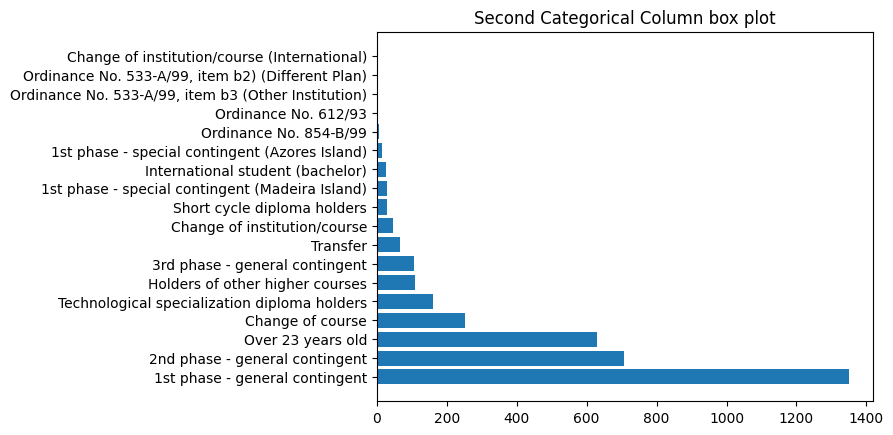

In [ ]:
fig, ax = plt.subplots()

values = train_categorical["C1"].value_counts().to_dict().values()

keys = list(train_categorical["C1"].value_counts().to_dict().keys())
print(keys)

ax.set_title("Second Categorical Column box plot")
ax.barh(y = keys, width = values)


Text(0.5, 1.0, 'Third Categorical Column box plot')

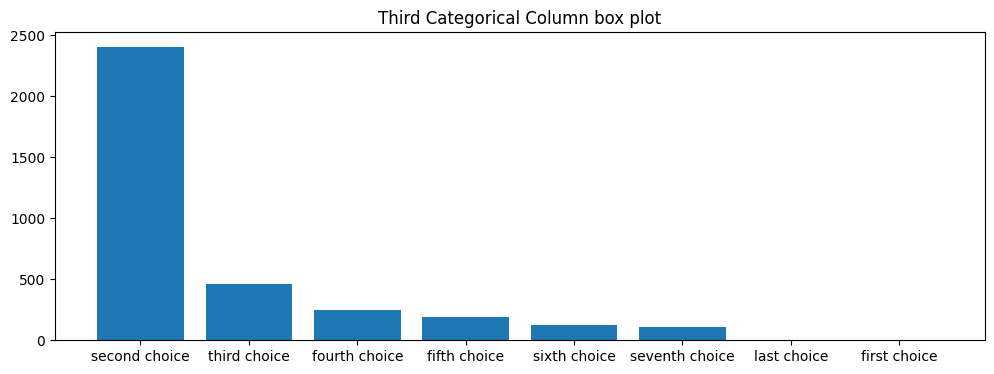

In [ ]:
fig, ax = plt.subplots(figsize=(,4))
ax.bar(train_categorical["C2"].value_counts().to_dict().keys(),train_categorical["C2"].value_counts().to_dict().values())
ax.set_title("Third Categorical Column box plot")

###Q4 : Outlier Detection (first 3 numerical for 2 detection methods)

In [ ]:
# Scipy Z-score https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/


In [ ]:
from scipy import stats

z = np.abs(stats.zscore(train_numerical[train_numerical.columns[0]].to_numpy()))
print(z)

threshold_z = 3

outlier_indices = np.where(z > threshold_z)[0]
no_outliers = train_numerical.drop(outlier_indices)
print("Original DataFrame Shape:", train_numerical.shape)
print("DataFrame Shape after Removing Outliers:", no_outliers.shape)

[0.20013488 0.20013488 1.03107392 ... 2.46633225 0.42675461 0.2531046 ]
Original DataFrame Shape: (3539, 18)
DataFrame Shape after Removing Outliers: (3521, 18)


In [ ]:
z = np.abs(stats.zscore(train_numerical[train_numerical.columns[1]].to_numpy()))
print(z)

threshold_z = 3

outlier_indices = np.where(z > threshold_z)[0]
no_outliers = train_numerical.drop(outlier_indices)
print("Original DataFrame Shape:", train_numerical.shape)
print("DataFrame Shape after Removing Outliers:", no_outliers.shape)

[1.58833753 0.24183091 0.16212107 ... 0.02747041 0.56607306 0.70072372]
Original DataFrame Shape: (3539, 18)
DataFrame Shape after Removing Outliers: (3460, 18)


In [ ]:
z = np.abs(stats.zscore(train_numerical[train_numerical.columns[2]].to_numpy()))
print(z)

threshold_z = 3


outlier_indices = np.where(z > threshold_z)[0]
no_outliers = train_numerical.drop(outlier_indices)
print("Original DataFrame Shape:", train_numerical.shape)
print("DataFrame Shape after Removing Outliers:", no_outliers.shape)

[0.30049209 0.30049209 0.30049209 ... 0.30049209 0.30049209 0.30049209]
[  18   33   83  150  152  173  278  337  362  391  424  474  493  508
  513  516  522  526  549  552  555  586  609  643  657  683  771  783
  851  909  912  916  947 1106 1112 1174 1180 1189 1240 1243 1244 1298
 1299 1316 1364 1412 1428 1429 1440 1463 1507 1524 1541 1576 1581 1589
 1602 1632 1647 1699 1789 1797 1843 1847 1855 1876 1884 1931 1965 1986
 2015 2054 2075 2100 2122 2224 2242 2279 2335 2339 2377 2430 2455 2459
 2535 2555 2625 2674 2676 2684 2698 2716 2757 2764 2804 2814 2821 2827
 2913 2920 2950 3045 3050 3053 3064 3068 3086 3273 3354 3376 3448 3470
 3500 3528]
Original DataFrame Shape: (3539, 18)
DataFrame Shape after Removing Outliers: (3425, 18)


In [ ]:
# Sci-kit learn: Isolation Forest https://scikit-learn.org/stable/modules/outlier_detection.html

In [ ]:
from sklearn.ensemble import IsolationForest
train_numerical[train_numerical.columns[0]].to_numpy()
clf = IsolationForest().fit_predict(train_numerical[train_numerical.columns[0]].to_numpy().reshape(-1,1))
print(clf)
outlier_indices = np.where(clf==-1)[0]
#print(outlier_indices)
no_outliers = train_numerical.drop(outlier_indices)
print("Original DataFrame Shape:", train_numerical.shape)
print("DataFrame Shape after Removing Outliers:", no_outliers.shape)

[ 1  1  1 ... -1  1  1]
Original DataFrame Shape: (3539, 18)
DataFrame Shape after Removing Outliers: (2731, 18)


In [ ]:
train_numerical[train_numerical.columns[1]].to_numpy()
clf = IsolationForest().fit_predict(train_numerical[train_numerical.columns[0]].to_numpy().reshape(-1,1))
print(clf)
outlier_indices = np.where(clf==-1)[0]
#print(outlier_indices)
no_outliers = train_numerical.drop(outlier_indices)
print("Original DataFrame Shape:", train_numerical.shape)
print("DataFrame Shape after Removing Outliers:", no_outliers.shape)

[ 1  1 -1 ... -1  1  1]
Original DataFrame Shape: (3539, 18)
DataFrame Shape after Removing Outliers: (2528, 18)


In [ ]:
train_numerical[train_numerical.columns[2]].to_numpy()
clf = IsolationForest().fit_predict(train_numerical[train_numerical.columns[0]].to_numpy().reshape(-1,1))
print(clf)
outlier_indices = np.where(clf==-1)[0]
#print(outlier_indices)
no_outliers = train_numerical.drop(outlier_indices)
print("Original DataFrame Shape:", train_numerical.shape)
print("DataFrame Shape after Removing Outliers:", no_outliers.shape)

[ 1  1 -1 ... -1  1  1]
Original DataFrame Shape: (3539, 18)
DataFrame Shape after Removing Outliers: (2350, 18)


###Q5 : Feature Correlation

<Axes: >

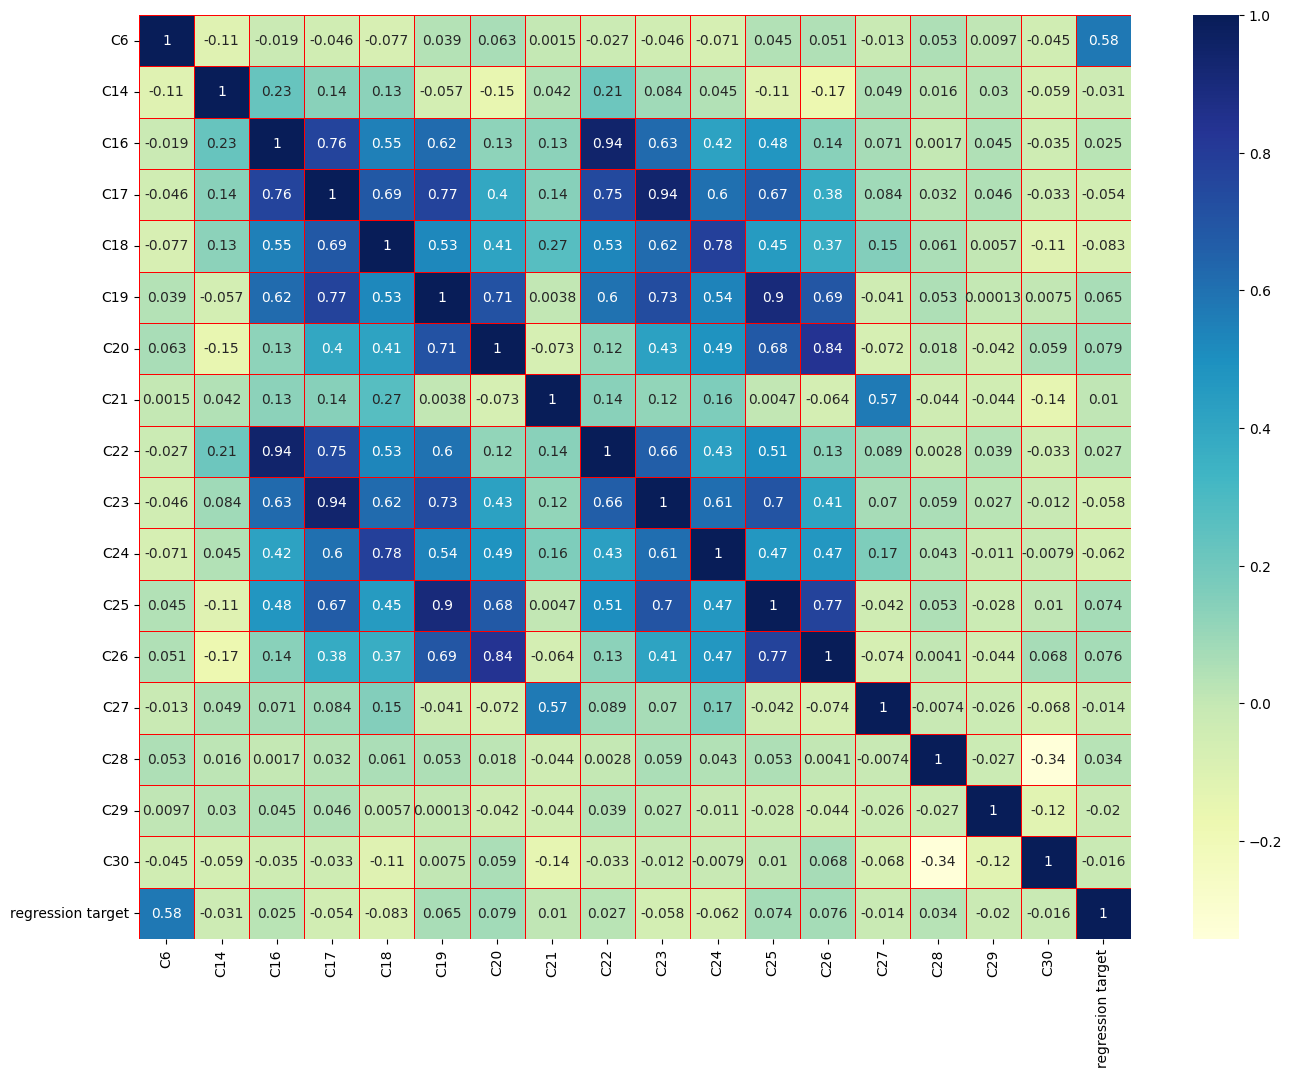

In [ ]:
fig, ax = plt.subplots(figsize=(16,12))
train_numerical.corr()
sns.heatmap(train_numerical.corr(), annot=True, cmap='YlGnBu', linecolor='r', linewidths=0.5)

### Q6 :
- Based on the exploration, briefly outline the preprocessing steps that are necessary for
the regression models or neural networks to run.
- Briefly discuss any specific challenges identified during exploration that are better addressed in preprocessing (those that do not affect running models, but might affect model
performance).

- Ans: Missing value
- Ans: Encoding

---
- Ans: Scaling
- Ans: PCA


##Part 2

###Q7 : handle missing value
 Handling Missing Values: Apply SimpleImputer to handle missing values.<br>
 Experiment
with different imputation strategies (mean, median, mode, and constant) on different types of
feature columns with missing values. <br>
Briefly discuss their impact on feature distribution and
model performance.<br> Briefly judge what imputation should be used and when

In [ ]:
#Missing value handling Numerical
train_numerical[train_numerical.columns]

mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')
mode_imputer = SimpleImputer(strategy='most_frequent')
constant_zero_imputer= SimpleImputer(strategy='constant', fill_value = 0)
imputation = ["mean","median","median","median","median","mode","mean","zero","median","median","median","median","mean","zero","mean","mean","mean"]

for i, x in enumerate(imputation):
  if x=="mean":
    train[train_numerical.columns[i]] = mean_imputer.fit_transform(train_numerical[[train_numerical.columns[i]]])
  elif x=="mode":
    train[train_numerical.columns[i]] = mode_imputer.fit_transform(train_numerical[[train_numerical.columns[i]]])
  elif x=="median":
    train[train_numerical.columns[i]] = median_imputer.fit_transform(train_numerical[[train_numerical.columns[i]]])
  else:
    train[train_numerical.columns[i]] = constant_zero_imputer.fit_transform(train_numerical[[train_numerical.columns[i]]])

In [ ]:
#Missing value handling Categorical
mode_imputer = SimpleImputer(strategy='most_frequent')
constant_no_imputer= SimpleImputer(strategy='constant', fill_value ="no")

mode_list = ["C0", "C1", "C2", "C3", "C4", "C5", "C7", "C12"]
constant_no_list = ["C8", "C9", "C10", "C11", "C13", "C15"]

for x in mode_list:
  train[x] = mode_imputer.fit_transform(train[[x]])


for y in constant_no_list:
  train[y] = constant_no_imputer.fit_transform(train[[y]])

#train.isnull().any()

In [ ]:
###Fore report
#Mean
mean_imputer = SimpleImputer(strategy='mean')
train_numerical["mean_imputed"]= mean_imputer.fit_transform(train_numerical[train_numerical.columns[0]].to_numpy().reshape(-1,1))

#Median
median_imputer = SimpleImputer(strategy='median')
train_numerical["median_imputed"] = median_imputer.fit_transform(train_numerical[train_numerical.columns[0]].to_numpy().reshape(-1,1))

#Mode
mode_imputer = SimpleImputer(strategy='most_frequent')
train_numerical["mode_imputed"] = mode_imputer.fit_transform(train_numerical[train_numerical.columns[0]].to_numpy().reshape(-1,1))

#constant
constant_zero_imputer= SimpleImputer(strategy='constant', fill_value = 0)
train_numerical["constant_imputed"] = constant_zero_imputer.fit_transform(train_numerical[train_numerical.columns[0]].to_numpy().reshape(-1,1))



In [ ]:
#For report
#Mode
mode_imputer = SimpleImputer(strategy='most_frequent')
train_categorical["mode_imputed"] = mode_imputer.fit_transform(train_categorical[train_categorical.columns[0]].to_numpy().reshape(-1,1))

#constant
constant_zero_imputer= SimpleImputer(strategy='constant', fill_value = 'single')
train_categorical["constant_imputed"] = constant_zero_imputer.fit_transform(train_categorical[train_categorical.columns[0]].to_numpy().reshape(-1,1))
train_categorical[train_categorical["C0"].isnull()]

,C0,C1,C2,C3,C4,C5,C7,C8,C9,C10,C11,C12,C13,C15,classification target,mode_imputed,constant_imputed
21,NaN,1st phase - general contingent,seventh choice,Nursing,daytime,Secondary education,Portuguese,yes,no,yes,yes,male,yes,no,success,single,single
172,NaN,1st phase - general contingent,third choice,Journalism and Communication,daytime,NaN,Portuguese,yes,no,no,yes,female,no,no,success,single,single
408,NaN,2nd phase - general contingent,fourth choice,Nursing,daytime,Secondary education,Portuguese,yes,no,no,yes,female,no,no,success,single,single
715,NaN,Over 23 years old,second choice,Nursing,daytime,Secondary education,Portuguese,no,no,no,yes,female,yes,no,success,single,single
754,NaN,Change of course,second choice,Advertising and Marketing Management,daytime,Secondary education,Portuguese,no,no,no,no,male,no,no,failure,single,single
810,NaN,Over 23 years old,second choice,Equinculture,daytime,Secondary education,Portuguese,no,no,yes,yes,male,no,no,failure,single,single
883,NaN,1st phase - general contingent,second choice,Journalism and Communication,daytime,Secondary education,Portuguese,yes,no,no,yes,female,no,no,failure,single,single
884,NaN,1st phase - general contingent,second choice,Social Service,daytime,Secondary education,Portuguese,no,no,no,yes,female,no,no,success,single,single
929,NaN,1st phase - general contingent,seventh choice,Animation and Multimedia Design,daytime,Secondary education,Portuguese,yes,no,no,yes,male,yes,no,failure,single,single
1054,NaN,1st phase - general contingent,third choice,Nursing,daytime,Secondary education,Portuguese,yes,no,no,yes,NaN,no,no,success,single,single


### Q8: Normalization and standardization
Normalization and Standardization: <br>Normalize/standardize different types of numerical features using StandardScaler, MinMaxScaler, or RobustScaler. <br>You need to report the
first numerical feature column of the first 10 samples before and after processing. <br>Briefly discuss
the difference between these techniques and when to use each.

In [ ]:
#Actual Preprocess
minmax_scaler = MinMaxScaler()
std_scaler = StandardScaler()
robust_scaler = RobustScaler()

train[train_numerical.columns[:6]] = minmax_scaler.fit_transform(train[train_numerical.columns[:6]])
train[train_numerical.columns[6:12]] = std_scaler.fit_transform(train[train_numerical.columns[6:12]])
train[train_numerical.columns[12:-1]] = robust_scaler.fit_transform(train[train_numerical.columns[12:-1]])

train
#train_numerical

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,...,C23,C24,C25,C26,C27,C28,C29,C30,regression target,classification target
0,divorced,Holders of other higher courses,second choice,Management,daytime,Higher education - degree,0.368421,Portuguese,no,no,...,-0.540875,-0.764134,-1.514168,-4.815789,0.0,0.000000,-0.276182,0.487106,0.6500,failure
1,single,Over 23 years old,second choice,Veterinary Nursing,daytime,Secondary education,0.368421,Portuguese,no,no,...,-0.082833,1.511975,-0.832667,-0.342105,0.0,0.000000,-0.276182,0.487106,0.5500,success
2,single,1st phase - general contingent,seventh choice,Communication Design,daytime,Frequency of higher education,0.252632,Portuguese,yes,no,...,-0.082833,-0.005431,0.530334,0.562500,0.0,-0.066667,0.071645,0.406877,0.6160,success
3,married,Over 23 years old,second choice,Social Service,daytime,Basic education 3rd cycle (9th/10th/11th year)...,0.401053,Portuguese,no,no,...,-0.082833,-2.028640,-1.514168,-4.815789,0.0,0.977778,0.680340,-1.255014,0.5175,failure
4,single,1st phase - general contingent,fourth choice,Nursing,daytime,Secondary education,0.494737,Portuguese,yes,no,...,0.375209,-0.258332,0.530334,0.671053,0.0,-0.777778,0.593384,0.000000,0.6865,success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,single,1st phase - general contingent,third choice,Communication Design,daytime,Secondary education,0.410526,Portuguese,yes,no,...,-0.082833,0.753272,-0.151166,-0.342105,0.0,0.622222,0.000000,0.134670,0.6385,failure
3535,single,1st phase - general contingent,second choice,Basic Education,daytime,Secondary education,0.400000,Portuguese,yes,no,...,0.833250,-0.005431,1.211835,0.167763,0.0,0.977778,0.680340,-1.255014,0.6565,success
3536,single,1st phase - general contingent,second choice,Social Service (evening attendance),evening,Secondary education,0.052632,Portuguese,no,no,...,-0.082833,-0.511233,0.189584,0.118421,0.0,0.355556,1.071645,-0.578797,0.5640,success
3537,single,1st phase - general contingent,fifth choice,Social Service,daytime,Secondary education,0.336842,Portuguese,yes,no,...,-0.082833,-0.258332,0.530334,0.484962,0.0,0.000000,-0.276182,0.487106,0.6020,success


In [ ]:
#For report
df_normalize_standard = pd.DataFrame(train_numerical.copy().iloc[:10,0])
minmax_scaler = MinMaxScaler()
std_scaler = StandardScaler()
robust_scaler = RobustScaler()
df_normalize_standard["C6_MinMax"] = minmax_scaler.fit_transform(df_normalize_standard["C6"].to_numpy().reshape(-1,1))
df_normalize_standard["C6_Std"] = std_scaler.fit_transform(df_normalize_standard["C6"].to_numpy().reshape(-1,1))
df_normalize_standard["C6_Robust"] = robust_scaler.fit_transform(df_normalize_standard["C6"].to_numpy().reshape(-1,1))
df_normalize_standard

,C6,C6_MinMax,C6_Std,C6_Robust
0,65.00,0.333333,-0.334189,-0.205
1,65.00,0.333333,-0.334189,-0.205
2,59.50,0.088889,-1.250916,-1.305
3,66.55,0.402222,-0.075838,0.105
4,71.00,0.600000,0.665877,0.995
5,70.00,0.555556,0.499200,0.795
6,57.50,0.000000,-1.584272,-1.705
7,65.50,0.355556,-0.250850,-0.105
8,70.00,0.555556,0.499200,0.795
9,80.00,1.000000,2.165977,2.795


###Q9: One-Hot and Oridnal Encoding
Utilize OneHotEncoder and OrdinalEncoder to encode different types of categorical variables.<br> You need to report the first categorical feature
column of the first 10 samples before and after processing.<br> Briefly explain the scenarios where
each encoding technique is preferred.




In [ ]:
#Actual preprocess
Ordinal_list=["C2", "C5"]
Nominal_list=[ x for x in train_categorical.columns[:-1] if x not in Ordinal_list]

onehot_encoder = OneHotEncoder(sparse_output=False)
ordinal_encoder = OrdinalEncoder(
    categories=[['first choice','second choice','third choice','fourth choice',
       'fifth choice', 'sixth choice','seventh choice' ,'last choice'],
          [ 'Basic education 2nd cycle (6th/7th/8th year) or equiv.',
            '10th year of schooling - not completed', '10th year of schooling',
            '11th year of schooling - not completed', 'Other - 11th year of schooling',
            'Basic education 3rd cycle (9th/10th/11th year) or equiv.',
            '12th year of schooling - not completed',
            'Secondary education', 'Technological specialization course',
            'Professional higher technical course',
            'Higher education - degree', 'Higher education - degree (1st cycle)', #of total 17
            "Higher education - bachelor's degree",'Frequency of higher education',
            "Higher education - master's", 'Higher education - master (2nd cycle)',
            'Higher education - doctorate'
          ]
        ],
    handle_unknown="use_encoded_value",
    unknown_value=-1
)

#OneHot
onehot_encoded = onehot_encoder.fit_transform(train[Nominal_list])
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(Nominal_list))

#Ordianl:
ordinal_encoded = ordinal_encoder.fit_transform(train[Ordinal_list])
ordinal_encoded_df = pd.DataFrame(ordinal_encoded, columns=ordinal_encoder.get_feature_names_out(Ordinal_list))

##We need drop and then concat to "train"

trainy = train[train.columns[-2:]]
train = train.drop(columns = train_categorical.columns)
train = train.drop(columns = train.columns[-1])

train = pd.concat([train, ordinal_encoded_df, onehot_encoded_df, trainy], axis=1)


In [ ]:
#For report
df_encoding = pd.DataFrame(train_categorical.copy().iloc[:10,0])

onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
ordinal_encoder = OrdinalEncoder(categories=[['divorced', 'single', 'married']])

#Onehot
onehot_encoded = onehot_encoder.fit_transform(df_encoding[["C0"]])
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(['C0']))

#Ordinal
ordinal_encoded = ordinal_encoder.fit_transform(df_encoding[["C0"]])
df_encoding[["C0_Ordinal"]] = ordinal_encoded

df_encoding = pd.concat([df_encoding, onehot_encoded_df], axis=1)

df_encoding

<bound method Series.unique of 0    divorced
1      single
2      single
3     married
4      single
5      single
6      single
7      single
8      single
9      single
Name: C0, dtype: object>


,C0,C0_Ordinal,C0_married,C0_single
0,divorced,0.0,0.0,0.0
1,single,1.0,0.0,1.0
2,single,1.0,0.0,1.0
3,married,2.0,1.0,0.0
4,single,1.0,0.0,1.0
5,single,1.0,0.0,1.0
6,single,1.0,0.0,1.0
7,single,1.0,0.0,1.0
8,single,1.0,0.0,1.0
9,single,1.0,0.0,1.0


### Q10 : Feature selection
- Use at least two feature selection modules in scikit-learn, such as
VarianceThreshold and SelectKBest.
- Think about how feature selection impacts the performance of your models. You need to report which features were removed for what reasons.


In [ ]:
#For visualizing
train

,C6,C14,C16,C17,C18,C19,C20,C21,C22,C23,...,C11_no,C11_yes,C12_female,C12_male,C13_no,C13_yes,C15_no,C15_yes,regression target,classification target
0,0.368421,0.339623,0.00,0.192308,0.111111,0.000000,-2.244836e+00,-0.194476,-0.281341,-0.540875,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.6500,failure
1,0.368421,0.150943,0.00,0.230769,0.288889,0.115385,2.201216e-01,-0.194476,-0.281341,-0.082833,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.5500,success
2,0.252632,0.094340,0.00,0.230769,0.133333,0.230769,7.483267e-01,-0.194476,-0.281341,-0.082833,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.6160,success
3,0.401053,0.471698,0.00,0.230769,0.000000,0.000000,-2.244836e+00,-0.194476,-0.281341,-0.082833,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.5175,failure
4,0.494737,0.094340,0.00,0.269231,0.155556,0.230769,3.753123e-16,-0.194476,-0.281341,0.375209,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.6865,success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,0.410526,0.018868,0.05,0.230769,0.177778,0.230769,2.301826e-01,1.279294,-0.281341,-0.082833,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.6385,failure
3535,0.400000,0.056604,0.00,0.230769,0.200000,0.192308,7.835404e-01,-0.194476,1.881975,0.833250,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.6565,success
3536,0.052632,0.113208,0.00,0.230769,0.133333,0.230769,7.483267e-01,-0.194476,-0.281341,-0.082833,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.5640,success
3537,0.336842,0.037736,0.00,0.230769,0.133333,0.230769,6.074720e-01,-0.194476,-0.281341,-0.082833,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.6020,success


In [ ]:
#Import the feature selection module
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif,f_regression

Original_feature_names = train.columns[:-2]

#var_threshold
var_threshold = VarianceThreshold(0.8*(1-0.8)) # Remove those appear >80%
print(var_threshold.fit_transform(train[train.columns[:-2]]).shape)
print(var_threshold.get_feature_names_out(train.columns[:-2]))

removed_var_thre = [x for x in Original_feature_names if x not in var_threshold.get_feature_names_out(train.columns[:-2])] #For report


#Select K best
selK = SelectKBest(f_regression, k=40).fit(train[train.columns[0:-2]], train["regression target"])
K_best_reg = selK.transform(train[train.columns[0:-2]])
print(selK.get_feature_names_out(train.columns[:-2]))
print(K_best_reg.shape)

removed_k_reg = [x for x in Original_feature_names if x not in selK.get_feature_names_out(train.columns[:-2])] #For report

selK_clf = SelectKBest(f_classif, k=40).fit(train[train.columns[0:-2]], train["classification target"])
K_best_clf = selK_clf.transform(train[train.columns[0:-2]])
print(selK_clf.get_feature_names_out(train.columns[:-2]))
print(K_best_clf.shape)

removed_k_clf = [x for x in Original_feature_names if x not in selK_clf.get_feature_names_out(train.columns[:-2])] #For report

#train = pd.concat([train[selK.get_feature_names_out(train.columns[:-2])], train[-2:]], axis=1)

(3539, 21)
['C20' 'C21' 'C22' 'C23' 'C24' 'C25' 'C26' 'C27' 'C28' 'C29' 'C30' 'C2'
 'C5' 'C1_1st phase - general contingent'
 'C1_2nd phase - general contingent' 'C8_no' 'C8_yes' 'C12_female'
 'C12_male' 'C13_no' 'C13_yes']
['C6' 'C17' 'C18' 'C19' 'C20' 'C23' 'C24' 'C25' 'C26' 'C2' 'C5'
 'C1_1st phase - general contingent' 'C1_2nd phase - general contingent'
 'C1_3rd phase - general contingent' 'C1_Change of course'
 'C1_Change of institution/course' 'C1_Holders of other higher courses'
 'C1_Ordinance No. 854-B/99' 'C1_Over 23 years old'
 'C1_Short cycle diploma holders'
 'C1_Technological specialization diploma holders'
 'C3_Advertising and Marketing Management' 'C3_Agronomy'
 'C3_Animation and Multimedia Design' 'C3_Basic Education'
 'C3_Biofuel Production Technologies' 'C3_Equinculture' 'C3_Management'
 'C3_Management (evening attendance)' 'C3_Oral Hygiene'
 'C3_Social Service (evening attendance)' 'C3_Tourism'
 'C3_Veterinary Nursing' 'C7_Cape Verdean' 'C7_Cuban' 'C7_Mexican'
 'C7_

###Q11 : Feature Engin

##Part 3 : Linear Regression
Please make sure you have executed Q7-9 to do preprocessing

### Train Test Split

In [ ]:
TrainX, ValidX, Trainy, Validy = train_test_split(train[train.columns[:-2]], train["regression target"], test_size=0.2, random_state=4211)

###Model Training

In [ ]:
#Continous and Binary, 3 Continous and 3 Binary
#'C6', 'C17', 'C20' #Continous
# C8, C9, C10 #Binary

###Q12 & Q13


In [ ]:
#Model 1
model = LinearRegression()

reg = model.fit(TrainX['C6'].to_numpy().reshape(-1, 1), Trainy)
predictions = reg.predict(ValidX['C6'].to_numpy().reshape(-1, 1))
print(f"R2 score is {r2_score(Validy, predictions)}")
print(f"MSE is {mean_squared_error(Validy, predictions)}")


R2 score is 0.3457983455467899
MSE is 0.0031823076103367383


In [ ]:
#Model 2
model = LinearRegression()

reg = model.fit(TrainX['C17'].to_numpy().reshape(-1, 1), Trainy)
predictions = reg.predict(ValidX['C17'].to_numpy().reshape(-1, 1))
print(f"R2 score is {r2_score(Validy, predictions)}")
print(f"MSE is {mean_squared_error(Validy, predictions)}")

R2 score is 0.007309433419105282
MSE is 0.004828857773801016


In [ ]:
#Model 3
model = LinearRegression()

reg = model.fit(TrainX['C20'].to_numpy().reshape(-1, 1), Trainy)
predictions = reg.predict(ValidX['C20'].to_numpy().reshape(-1, 1))
print(f"R2 score is {r2_score(Validy, predictions)}")
print(f"MSE is {mean_squared_error(Validy, predictions)}")

R2 score is -0.009679777672970902
MSE is 0.004911500328101982


In [ ]:
#Model 4
#These with "_yes" are binary despite one-hot encoded
model = LinearRegression()

reg = model.fit(TrainX['C8_yes'].to_numpy().reshape(-1, 1), Trainy)
predictions = reg.predict(ValidX['C8_yes'].to_numpy().reshape(-1, 1))
print(f"R2 score is {r2_score(Validy, predictions)}")
print(f"MSE is {mean_squared_error(Validy, predictions)}")

R2 score is -0.003034392532405006
MSE is 0.004879174424364981


In [ ]:
#Model 5
model = LinearRegression()

reg = model.fit(TrainX['C9_yes'].to_numpy().reshape(-1, 1), Trainy)
predictions = reg.predict(ValidX['C9_yes'].to_numpy().reshape(-1, 1))
print(f"R2 score is {r2_score(Validy, predictions)}")
print(f"MSE is {mean_squared_error(Validy, predictions)}")

R2 score is -0.00038420655713355956
MSE is 0.0048662828229138


In [ ]:
#Model 6
model = LinearRegression()

reg = model.fit(TrainX['C10_yes'].to_numpy().reshape(-1, 1), Trainy)
predictions = reg.predict(ValidX['C10_yes'].to_numpy().reshape(-1, 1))
print(f"R2 score is {r2_score(Validy, predictions)}")
print(f"MSE is {mean_squared_error(Validy, predictions)}")

R2 score is -0.00403012589518803
MSE is 0.004884018083558871


In [ ]:
#Model 7
model = LinearRegression()

import time
start = time.time()
reg = model.fit(TrainX[['C6','C17','C20','C8_yes','C9_yes','C10_yes']].to_numpy().reshape(-1, 6), Trainy)
end = time.time()
predictions = reg.predict(ValidX[['C6','C17','C20','C8_yes','C9_yes','C10_yes']].to_numpy().reshape(-1, 6))
print(f"R2 score is {r2_score(Validy, predictions)}") # Summation of them?
print(f"MSE is {mean_squared_error(Validy, predictions)}")
print(f"Train Time is {end-start}")

R2 score is 0.3399915206314814
MSE is 0.003210554410072095
Train Time is 0.05569934844970703


###Q14

In [ ]:
#Categoical feature with >=3 features
#C0 (single, married, deforced ...) One hotted
model = LinearRegression()

reg = model.fit(TrainX[TrainX.columns[19:25]], Trainy)
predictions = reg.predict(ValidX[ValidX.columns[19:25]])
print(f"R2 score is {r2_score(Validy, predictions)}")
print(f"MSE is {mean_squared_error(Validy, predictions)}")

R2 score is 0.0027947565607518987
MSE is 0.004850819030588966


###Q15 FFNN where H = (1,8,32,128)
-  Report the model setting, training time, and performance of the neural network model
for each value of H.
- You are also expected to repeat each setting three times for the same
hyperparameter setting and report the mean and standard deviation of the training time and
R2
score for each setting.


In [ ]:
#H = 1
import time
from sklearn.neural_network import MLPRegressor
time_list = []
R2_list = []


for i in range(3):
  start = time.time()
  regr = MLPRegressor(hidden_layer_sizes=(1,1,1),early_stopping=True)
  regr.fit(TrainX[['C6','C17','C20','C8_yes','C9_yes','C10_yes']].to_numpy().reshape(-1, 6),Trainy)
  end = time.time()
  time_list.append(end-start)
  predictions = regr.predict(ValidX[['C6','C17','C20','C8_yes','C9_yes','C10_yes']].to_numpy().reshape(-1, 6))
  print(f"R2 score is {r2_score(Validy, predictions)}")
  R2_list.append(r2_score(Validy, predictions))

print(f"the mean train time is: {np.asarray(time_list).mean()}")
print(f"the std train time is: {np.asarray(time_list).std()}")
print(f"the mean Rscore is: {np.asarray(R2_list).mean()}")
print(f"the std Rscore is: {np.asarray(R2_list).std()}")
R2_mean = [np.asarray(R2_list).mean()]

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


R2 score is -0.1635365356672649


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


R2 score is 0.12541765521749149
R2 score is -0.005130702803610054
the mean train time is: 0.8064754009246826
the std train time is: 0.01503415674333001
the mean Rscore is: -0.01441652775112782
the std Rscore is: 0.11814765060771208


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#H = 8
time_list = []
R2_list = []

for i in range(3):
  start = time.time()
  regr = MLPRegressor(hidden_layer_sizes=(8,8,8),early_stopping=True)
  regr.fit(TrainX[['C6','C17','C20','C8_yes','C9_yes','C10_yes']].to_numpy().reshape(-1, 6),Trainy)
  end = time.time()
  time_list.append(end-start)
  predictions = regr.predict(ValidX[['C6','C17','C20','C8_yes','C9_yes','C10_yes']].to_numpy().reshape(-1, 6))
  print(f"R2 score is {r2_score(Validy, predictions)}")
  R2_list.append(r2_score(Validy, predictions))

print(f"the mean train time is: {np.asarray(time_list).mean()}")
print(f"the std train time is: {np.asarray(time_list).std()}")
print(f"the mean Rscore is: {np.asarray(R2_list).mean()}")
print(f"the std Rscore is: {np.asarray(R2_list).std()}")
R2_mean.append(np.asarray(R2_list).mean())

R2 score is 0.305470846698342
R2 score is 0.33072003691640073
R2 score is 0.30056458847514966
the mean train time is: 0.8815045356750488
the std train time is: 0.056030824867365964
the mean Rscore is: 0.31225182402996415
the std Rscore is: 0.013211712173982032


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#H=32
time_list = []
R2_list = []


for i in range(3):
  start = time.time()
  regr = MLPRegressor(hidden_layer_sizes=(32,32,32),early_stopping=True)
  regr.fit(TrainX[['C6','C17','C20','C8_yes','C9_yes','C10_yes']].to_numpy().reshape(-1, 6),Trainy)
  end = time.time()
  time_list.append(end-start)
  predictions = regr.predict(ValidX[['C6','C17','C20','C8_yes','C9_yes','C10_yes']].to_numpy().reshape(-1, 6))
  print(f"R2 score is {r2_score(Validy, predictions)}")
  R2_list.append(r2_score(Validy, predictions))

print(f"the mean train time is: {np.asarray(time_list).mean()}")
print(f"the std train time is: {np.asarray(time_list).std()}")
print(f"the mean Rscore is: {np.asarray(R2_list).mean()}")
print(f"the std Rscore is: {np.asarray(R2_list).std()}")
R2_mean.append(np.asarray(R2_list).mean())

R2 score is 0.3561861063233419
R2 score is 0.37456866804581335
R2 score is 0.37709813180537777
the mean train time is: 0.9902059237162272
the std train time is: 0.3673170542116525
the mean Rscore is: 0.3692843020581777
the std Rscore is: 0.009319212962433748


In [ ]:
#H=128
time_list = []
R2_list = []


for i in range(3):
  start = time.time()
  regr = MLPRegressor(hidden_layer_sizes=(128,128,128),early_stopping=True)
  regr.fit(TrainX[['C6','C17','C20','C8_yes','C9_yes','C10_yes']].to_numpy().reshape(-1, 6),Trainy)
  end = time.time()
  time_list.append(end-start)
  predictions = regr.predict(ValidX[['C6','C17','C20','C8_yes','C9_yes','C10_yes']].to_numpy().reshape(-1, 6))
  print(f"R2 score is {r2_score(Validy, predictions)}")
  R2_list.append(r2_score(Validy, predictions))

print(f"the mean train time is: {np.asarray(time_list).mean()}")
print(f"the std train time is: {np.asarray(time_list).std()}")
print(f"the mean Rscore is: {np.asarray(R2_list).mean()}")
print(f"the std Rscore is: {np.asarray(R2_list).std()}")
R2_mean.append(np.asarray(R2_list).mean())

R2 score is 0.3682143141293073
R2 score is 0.3790491129068376
R2 score is 0.35828543966223936
the mean train time is: 1.236863136291504
the std train time is: 0.16548402684080812
the mean Rscore is: 0.3685162888994615
the std Rscore is: 0.008479423063057562


Text(0.5, 1.0, 'R_2 score for each H(Regression)')

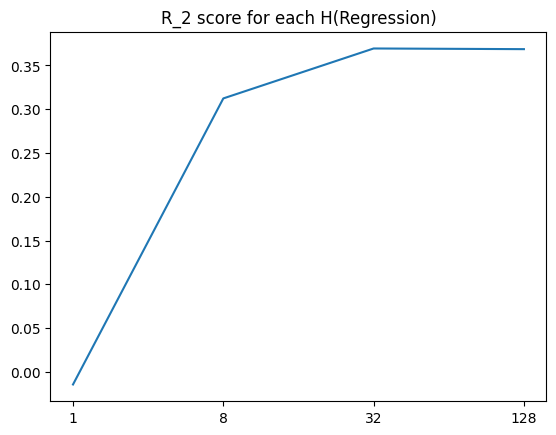

In [ ]:
#Plot R_2 for each H
fig, ax = plt.subplots()
x = np.arange(len(R2_mean))
ax.plot(x,R2_mean)
ax.set_xticks(x,["1","8","32","128"])
ax.set_title("R_2 score for each H(Regression)")

##Part 4: Classification
Please make sure the preprocessing is done

###Train Test Split

In [ ]:
TrainX, ValidX, Trainy, Validy = train_test_split(train[train.columns[:-2]], train["classification target"], test_size=0.2, random_state=4211)

###Q17: Model training


In [ ]:
#Model Training where "Use the features selected in [Q10]"
# eta = 0.1
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, f1_score

Features_selected = ['C6', 'C14', 'C17', 'C18', 'C19', 'C20', 'C21', 'C23', 'C24', 'C25', 'C26', 'C27',
 'C30', 'C2', 'C0_married', 'C0_single', 'C1_1st phase - general contingent',
 'C1_Holders of other higher courses', 'C1_Over 23 years old',
 'C1_Short cycle diploma holders', 'C3_Basic Education',
 'C3_Communication Design', 'C3_Equinculture', 'C3_Informatics Engineering',
 'C3_Management', 'C3_Management (evening attendance)', 'C3_Nursing',
 'C3_Social Service', 'C4_daytime', 'C4_evening', 'C8_no', 'C8_yes', 'C10_no',
 'C10_yes', 'C11_no', 'C11_yes', 'C12_female', 'C12_male', 'C13_no', 'C13_yes']


time_list = []
Accuracy_list = []
F1_list = []
for i in range(3):
  logreg = SGDClassifier(loss='log_loss' , learning_rate='constant', eta0=0.1)
  start = time.time()
  logreg.fit(TrainX[Features_selected],Trainy)
  end = time.time()
  time_list.append(end-start)
  predictions = logreg.predict(ValidX[Features_selected])
  print(f"Accuracy is {accuracy_score(Validy, predictions)}")
  Accuracy_list.append(accuracy_score(Validy, predictions))
  print(f"F1 is {f1_score(Validy, predictions, pos_label='success')}")
  F1_list.append(f1_score(Validy, predictions, pos_label="success"))

print(f"Mean time is {np.asarray(time_list).mean()}")
print(f"Std time is {np.asarray(time_list).std()}")

print(f"the mean Accuracy is: {np.asarray(Accuracy_list).mean()}")
print(f"the std Accuracy is: {np.asarray(Accuracy_list).std()}")

print(f"the mean F1 score is: {np.asarray(F1_list).mean()}")
print(f"the std F1 score is: {np.asarray(F1_list).std()}")

Accuracy is 0.865819209039548
F1 is 0.908565928777671
Accuracy is 0.8531073446327684
F1 is 0.9022556390977444
Accuracy is 0.8206214689265536
F1 is 0.8840182648401828
Mean time is 0.012182950973510742
Std time is 0.0011784025053944006
the mean Accuracy is: 0.8465160075329567
the std Accuracy is: 0.0190314340220412
the mean F1 score is: 0.8982799442385327
the std F1 score is: 0.010408380066309916


###Q18: Plot ROC and report AOC

In [ ]:
# For understanding what to fit
logreg.classes_

array(['failure', 'success'], dtype='<U7')

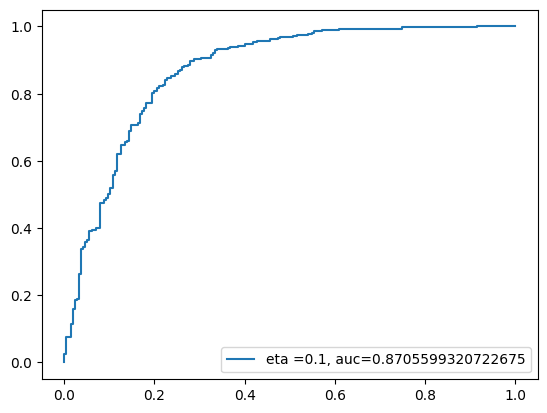

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = logreg.predict_proba(ValidX[Features_selected])

fpr, tpr, thresholds = roc_curve(Validy, y_pred_proba[:,1],pos_label="success")
auc = roc_auc_score(Validy, y_pred_proba[:,1])
plt.plot(fpr,tpr,label="eta =0.1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

###Q19 Train different model

In [ ]:
#Model Training where "Use the features selected in [Q10]"
# eta = 0.1
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, f1_score
import time


start = time.time()
logreg = SGDClassifier(loss='log_loss' , learning_rate='constant', eta0=0.1 , random_state = 4211)
logreg.fit(TrainX[Features_selected],Trainy)
end = time.time()

predictions = logreg.predict(ValidX[Features_selected])

print(f"Accuracy is {accuracy_score(Validy, predictions)}")
print(f"F1 is {f1_score(Validy, predictions, pos_label='success')}")
print(f"Train time is {end-start}")

Accuracy is 0.8149717514124294
F1 is 0.8774555659494855
Train time is 0.023007631301879883


In [ ]:
#Model Training where "Use the features selected in [Q10]"
# eta = 0.05
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, f1_score


start = time.time()
logreg = SGDClassifier(loss='log_loss' , learning_rate='constant', eta0=0.05 , random_state = 4211)
logreg.fit(TrainX[Features_selected],Trainy)
end = time.time()

predictions = logreg.predict(ValidX[Features_selected])

print(f"Accuracy is {accuracy_score(Validy, predictions)}")
print(f"F1 is {f1_score(Validy, predictions, pos_label='success')}")
print(f"Train time is {end-start}")

Accuracy is 0.864406779661017
F1 is 0.9034205231388329
Train time is 0.05936765670776367


In [ ]:
#Model Training where "Use the features selected in [Q10]"
# eta = 0.01
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, f1_score


start = time.time()
logreg = SGDClassifier(loss='log_loss' , learning_rate='constant', eta0=0.01 , random_state = 4211)
logreg.fit(TrainX[Features_selected],Trainy)
end = time.time()

predictions = logreg.predict(ValidX[Features_selected])

print(f"Accuracy is {accuracy_score(Validy, predictions)}")
print(f"F1 is {f1_score(Validy, predictions, pos_label='success')}")
print(f"Train time is {end-start}")

Accuracy is 0.8771186440677966
F1 is 0.9149560117302052
Train time is 0.0214993953704834


###Feed Forward Neural Network (Classification)

###Q20

In [ ]:
#H = 1 #Did not mention the features picked # I use all
import time
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score

time_list = []
Accuracy_list = []
F1_list = []

for i in range(3):
  clf = MLPClassifier(hidden_layer_sizes=(1,)*3,early_stopping=True)
  start = time.time()
  clf.fit(TrainX.to_numpy(),Trainy)
  end = time.time()
  time_list.append(end-start)
  predictions = clf.predict(ValidX.to_numpy())
  print(f"Accuracy is {accuracy_score(Validy, predictions)}")
  Accuracy_list.append(accuracy_score(Validy, predictions))
  print(f"F1 score is {f1_score(Validy, predictions, pos_label='success')}")
  F1_list.append(f1_score(Validy, predictions, pos_label='success'))

print(f"the mean train time is: {np.asarray(time_list).mean()}")
print(f"the std train time is: {np.asarray(time_list).std()}")
print(f"the mean F1 score is: {np.asarray(F1_list).mean()}")
print(f"the std F1 score is: {np.asarray(F1_list).std()}")
print(f"the mean Accuracy is: {np.asarray(Accuracy_list).mean()}")
print(f"the std Accuracy is: {np.asarray(Accuracy_list).std()}")
F1_mean = [np.asarray(F1_list).mean()]
Accuracy_mean = [np.asarray(Accuracy_list).mean()]

Accuracy is 0.3036723163841808
F1 score is 0.0
Accuracy is 0.3036723163841808
F1 score is 0.0
Accuracy is 0.6963276836158192
F1 score is 0.8209825145711906
the mean train time is: 0.2219374974568685
the std train time is: 0.045588806502016334
the mean F1 score is: 0.2736608381903969
the std F1 score is: 0.3870148688592483
the mean Accuracy is: 0.4345574387947269
the std Accuracy is: 0.18509951522585705


In [ ]:
#H = 8

time_list = []
Accuracy_list = []
F1_list = []


for i in range(3):
  clf = MLPClassifier(hidden_layer_sizes=(8,)*3,early_stopping=True)
  start = time.time()
  clf.fit(TrainX.to_numpy(),Trainy)
  end = time.time()
  time_list.append(end-start)
  predictions = clf.predict(ValidX.to_numpy())
  print(f"Accuracy is {accuracy_score(Validy, predictions)}")
  Accuracy_list.append(accuracy_score(Validy, predictions))
  print(f"F1 score is {f1_score(Validy, predictions, pos_label='success')}")
  F1_list.append(f1_score(Validy, predictions, pos_label='success'))

print(f"the mean train time is: {np.asarray(time_list).mean()}")
print(f"the std train time is: {np.asarray(time_list).std()}")
print(f"the mean F1 score is: {np.asarray(F1_list).mean()}")
print(f"the std F1 score is: {np.asarray(F1_list).std()}")
print(f"the mean Accuracy is: {np.asarray(Accuracy_list).mean()}")
print(f"the std Accuracy is: {np.asarray(Accuracy_list).std()}")
F1_mean.append(np.asarray(F1_list).mean())
Accuracy_mean.append(np.asarray(Accuracy_list).mean())

Accuracy is 0.8714689265536724
F1 score is 0.9134157944814462
Accuracy is 0.8757062146892656
F1 score is 0.9160305343511451
Accuracy is 0.884180790960452
F1 score is 0.9197651663405089
the mean train time is: 0.4989999135335286
the std train time is: 0.07442799166833931
the mean F1 score is: 0.9164038317243667
the std F1 score is: 0.0026055254041881773
the mean Accuracy is: 0.8771186440677967
the std Accuracy is: 0.005284826817477304


In [ ]:
#H=32
time_list = []
Accuracy_list = []
F1_list = []


for i in range(3):
  clf = MLPClassifier(hidden_layer_sizes=(32,)*3,early_stopping=True)
  start = time.time()
  clf.fit(TrainX.to_numpy(),Trainy)
  end = time.time()
  time_list.append(end-start)
  predictions = clf.predict(ValidX.to_numpy())
  print(f"Accuracy is {accuracy_score(Validy, predictions)}")
  Accuracy_list.append(accuracy_score(Validy, predictions))
  print(f"F1 score is {f1_score(Validy, predictions, pos_label='success')}")
  F1_list.append(f1_score(Validy, predictions, pos_label='success'))

print(f"the mean train time is: {np.asarray(time_list).mean()}")
print(f"the std train time is: {np.asarray(time_list).std()}")
print(f"the mean F1 score is: {np.asarray(F1_list).mean()}")
print(f"the std F1 score is: {np.asarray(F1_list).std()}")
print(f"the mean Accuracy is: {np.asarray(Accuracy_list).mean()}")
print(f"the std Accuracy is: {np.asarray(Accuracy_list).std()}")
F1_mean.append(np.asarray(F1_list).mean())
Accuracy_mean.append(np.asarray(Accuracy_list).mean())

Accuracy is 0.8757062146892656
F1 score is 0.9152215799614644
Accuracy is 0.8771186440677966
F1 score is 0.9161041465766635
Accuracy is 0.884180790960452
F1 score is 0.9213051823416506
the mean train time is: 0.7500683466593424
the std train time is: 0.24114470155551976
the mean F1 score is: 0.9175436362932595
the std F1 score is: 0.002684107854662464
the mean Accuracy is: 0.8790018832391714
the std Accuracy is: 0.00370716001601309


In [ ]:
H=128
time_list = []
Accuracy_list = []
F1_list = []

for i in range(3):
  clf = MLPClassifier(hidden_layer_sizes=(128,)*3,early_stopping=True)
  start = time.time()
  clf.fit(TrainX.to_numpy(),Trainy)
  end = time.time()
  time_list.append(end-start)
  predictions = clf.predict(ValidX.to_numpy())
  print(f"Accuracy is {accuracy_score(Validy, predictions)}")
  Accuracy_list.append(accuracy_score(Validy, predictions))
  print(f"F1 score is {f1_score(Validy, predictions, pos_label='success')}")
  F1_list.append(f1_score(Validy, predictions, pos_label='success'))

print(f"the mean train time is: {np.asarray(time_list).mean()}")
print(f"the std train time is: {np.asarray(time_list).std()}")
print(f"the mean F1 score is: {np.asarray(F1_list).mean()}")
print(f"the std F1 score is: {np.asarray(F1_list).std()}")
print(f"the mean Accuracy is: {np.asarray(Accuracy_list).mean()}")
print(f"the std Accuracy is: {np.asarray(Accuracy_list).std()}")
F1_mean.append(np.asarray(F1_list).mean())
Accuracy_mean.append(np.asarray(Accuracy_list).mean())

Accuracy is 0.8742937853107344
F1 score is 0.912487708947886
Accuracy is 0.8813559322033898
F1 score is 0.92
Accuracy is 0.8686440677966102
F1 score is 0.9087340529931306
the mean train time is: 3.713994344075521
the std train time is: 0.12869845579418007
the mean F1 score is: 0.9137405873136722
the std F1 score is: 0.004683849459578379
the mean Accuracy is: 0.8747645951035782
the std Accuracy is: 0.0052002641323857035


###Q20 Plot Report

###Q21 Plot

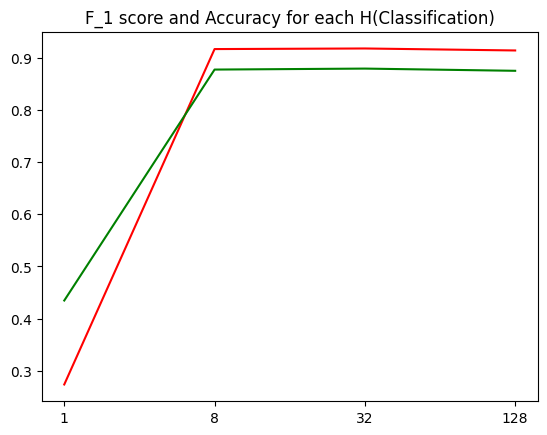

In [ ]:
fig, ax = plt.subplots()
x = np.arange(len(F1_mean))
ax.plot(x,F1_mean, color="red")
ax.plot(x,Accuracy_mean, color="green")
ax.set_xticks(x,["1","8","32","128"])
ax.set_title("F_1 score and Accuracy for each H(Classification)")
plt.show()

##Part 5:
The third one just need to execute one time.
Other may need to execute each time you train for training combination

In [ ]:
#Import module
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
#We still use trian test split to validate
#Reset as we would like to do preprocess later
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
TrainX, ValidX, Trainy, Validy = train_test_split(train[train.columns[:-2]], train["classification target"], test_size=0.2, random_state=4211)

In [ ]:
### A Encoder for Combination B and C
ordinal_encoder = OrdinalEncoder(
    categories=[['first choice','second choice','third choice','fourth choice',
       'fifth choice', 'sixth choice','seventh choice' ,'last choice'],
          [ 'Basic education 2nd cycle (6th/7th/8th year) or equiv.',
            '10th year of schooling - not completed', '10th year of schooling',
            '11th year of schooling - not completed', 'Other - 11th year of schooling',
            'Basic education 3rd cycle (9th/10th/11th year) or equiv.',
            '12th year of schooling - not completed',
            'Secondary education', 'Technological specialization course',
            'Professional higher technical course',
            'Higher education - degree', 'Higher education - degree (1st cycle)', #of total 17
            "Higher education - bachelor's degree",'Frequency of higher education',
            "Higher education - master's", 'Higher education - master (2nd cycle)',
            'Higher education - doctorate'
          ]],
    handle_unknown="use_encoded_value",
    unknown_value=-1
)

###Q24 Combination A

In [ ]:
#Combination A
#Numerical: mean impute, standard scaler
#Categrical: one-hot
mean_imputer = SimpleImputer(strategy='mean')
std_scaler = StandardScaler()
onehot_encoder = OneHotEncoder(handle_unknown='ignore')

num_columns = train_numerical.columns[:-1]
cat_columns = train_categorical.columns[:-1]

numeric_transformer = Pipeline(
    steps=[("imputer", mean_imputer), ("scaler", std_scaler)]
)

categorical_transformer = Pipeline(
    steps=[("encoder", onehot_encoder)]
)

preprocessor_A = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_columns),
        ("cat", categorical_transformer, cat_columns),
    ]
)

preprocessor_A.fit(TrainX)
TrainX = preprocessor_A.transform(TrainX)
ValidX = preprocessor_A.transform(ValidX)


###Q25: Combination B

In [ ]:
#Combination B
#Numerical: 0 impute, minmax
#Categrical: one-hot for ordinal,

num_columns = train_numerical.columns[:-1]
ordinal_columns = ["C2", "C5"]
onehot_columns = [x for x in train_categorical.columns[:-1] if x not in ordinal_columns]

train_categorical.columns[:-1]

numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy='constant', fill_value = 0)),
     ("scaler", MinMaxScaler())],
)

onehot_transformer = Pipeline(
    steps=[("onehot_encoder", OneHotEncoder(handle_unknown='ignore'))]
)

ordinal_transformer = Pipeline(
    steps=[("ordinal_encoder",ordinal_encoder)]
)

preprocessor_B = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_columns),
        ("ord", ordinal_transformer, ordinal_columns),
        ("onehot", onehot_transformer, onehot_columns)
    ]
)


preprocessor_B.fit(TrainX)
TrainX = preprocessor_B.transform(TrainX)
ValidX = preprocessor_B.transform(ValidX)

###Q26 Combination C

In [ ]:
#Combination C Custom
#Please run Combination B before this (would use the same encoder for some part)

from sklearn.feature_selection import SelectKBest,f_classif

#For handling numerical missing value
mean_impute_columns = ['C6', 'C17', 'C20', 'C22', 'C23', 'C25', 'C26', 'C28', 'C29', 'C30']
median_impute_columns = [x for x in train_numerical.columns[:-1] if x not in mean_impute_columns]
#For handling categorical missing value
cat_columns = train_categorical.columns[:-1]

#Scale
num_columns = train_numerical.columns[:-1]
ordinal_columns = ["C2", "C5"]
onehot_columns = [x for x in train_categorical.columns[:-1] if x not in ordinal_columns]

#Pipeline

onehot_transformer = Pipeline(
    steps=[("mode", SimpleImputer(strategy='most_frequent')),
        ("onehot_encoder", OneHotEncoder(handle_unknown='ignore'))]
)

ordinal_transformer = Pipeline(
    steps=[("mode", SimpleImputer(strategy='most_frequent')),
        ("ordinal_encoder",ordinal_encoder)]
)


numeric_mean_transformer = Pipeline(
    steps=[("mean",SimpleImputer(strategy='mean')),
        ("scaler",StandardScaler())]
)

numeric_mode_transformer = Pipeline(
    steps=[("median", SimpleImputer(strategy='median')),
        ("scaler",StandardScaler())]
)


preprocessor_C = ColumnTransformer(
    transformers=[
        ("mean", numeric_mean_transformer ,mean_impute_columns),
        ("mode", numeric_mode_transformer,median_impute_columns),
        ("ord", ordinal_transformer, ordinal_columns), #Encode
        ("onehot", onehot_transformer, onehot_columns) #Encode
    ]
)

preprocessor_C.fit(TrainX)

TrainX = preprocessor_C.transform(TrainX)
ValidX = preprocessor_C.transform(ValidX)


###Model Training
Please rerun Code in Part5 again before training as I do preprocess also from these Combination

In [ ]:
#Model : 3 Hidden Layer
import time
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score

time_list = []
Accuracy_list = []
F1_list = []


for i in range(3):
  clf = MLPClassifier(hidden_layer_sizes=(60,40,20),early_stopping=True)
  start = time.time()
  clf.fit(TrainX,Trainy)
  end = time.time()
  time_list.append(end-start)
  predictions = clf.predict(ValidX)
  print(f"Accuracy is {accuracy_score(Validy, predictions)}")
  Accuracy_list.append(accuracy_score(Validy, predictions))
  print(f'''F1 score is {f1_score(Validy, predictions, pos_label="success")}''')
  F1_list.append(f1_score(Validy, predictions,pos_label="success"))

print(f"the mean train time is: {np.asarray(time_list).mean()}")
print(f"the std train time is: {np.asarray(time_list).std()}")
print(f"the mean F1 score is: {np.asarray(F1_list).mean()}")
print(f"the mean accuracy is: {np.asarray(Accuracy_list).mean()}")
F1_mean = [np.asarray(F1_list).mean()]
Accuracy_mean = [np.asarray(Accuracy_list).mean()]

Accuracy is 0.8700564971751412
F1 score is 0.9130434782608695
Accuracy is 0.8728813559322034
F1 score is 0.9144486692015209
Accuracy is 0.865819209039548
F1 score is 0.9096098953377735
the mean train time is: 1.1561566193898518
the std train time is: 0.05249056247037451
the mean F1 score is: 0.9123673476000547
the mean accuracy is: 0.8695856873822976


In [ ]:
#Store of result
#A
"""
the mean F1 score is: 0.9197226270428565
the mean accuracy is: 0.882768361581921
"""
#B
"""
the mean F1 score is: 0.9123673476000547
the mean accuracy is: 0.8695856873822976
"""

#C
"""
the mean F1 score is: 0.9208245700315244
the mean accuracy is: 0.8855932203389831
"""


###Hyperparameter tuning

In [ ]:
##Run this after combination C
df_later = pd.DataFrame(TrainX, columns=preprocessor_C.get_feature_names_out())

Features_selected = ['C6', 'C14', 'C17', 'C18', 'C19', 'C20', 'C21', 'C23', 'C24', 'C25', 'C26', 'C27',
 'C30', 'C2', 'C0_married', 'C0_single', 'C1_1st phase - general contingent',
 'C1_Holders of other higher courses', 'C1_Over 23 years old',
 'C1_Short cycle diploma holders', 'C3_Basic Education',
 'C3_Communication Design', 'C3_Equinculture', 'C3_Informatics Engineering',
 'C3_Management', 'C3_Management (evening attendance)', 'C3_Nursing',
 'C3_Social Service', 'C4_daytime', 'C4_evening', 'C8_no', 'C8_yes', 'C10_no',
 'C10_yes', 'C11_no', 'C11_yes', 'C12_female', 'C12_male', 'C13_no', 'C13_yes'] ###From Q10

Hyper_col = []

for x in df_later.columns:
  for y in Features_selected:
    if y in x:
      Hyper_col.append(x)
      break

index = []

for x in Hyper_col:
  index.append(df_later.columns.get_loc(x))

index

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 12,
 13,
 14,
 15,
 16,
 17,
 22,
 23,
 25,
 33,
 39,
 40,
 46,
 48,
 49,
 50,
 52,
 53,
 54,
 56,
 57,
 60,
 61,
 80,
 81,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91]

In [ ]:
from sklearn.model_selection import GridSearchCV


parameter_space = {'hidden_layer_sizes':[(60,40,20),(40,30,20),(25,20,15)],
            'activation':[ "logistic", "tanh", "relu"],
            'solver':["sgd", "adam"],
            'random_state':[4211],
            'alpha': 0.0001 * np.arange(1, 3),
            'learning_rate': ['constant', 'adaptive'],
            'early_stopping':[True]}
clf = GridSearchCV(MLPClassifier(), parameter_space, scoring="accuracy")
clf.fit(TrainX[:,index], Trainy)


GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'alpha': array([0.0001, 0.0002]),
                         'early_stopping': [True],
                         'hidden_layer_sizes': [(60, 40, 20), (40, 30, 20),
                                                (25, 20, 15)],
                         'learning_rate': ['constant', 'adaptive'],
                         'random_state': [4211], 'solver': ['sgd', 'adam']},
             scoring='accuracy')

In [ ]:
result_df = pd.DataFrame(clf.cv_results_)
clf.cv_results_
result_df.to_csv('result.csv', index=False)

In [ ]:
result_df = pd.read_csv('result.csv')

In [ ]:
result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_early_stopping,param_hidden_layer_sizes,param_learning_rate,param_random_state,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.726961,0.023412,0.009936,0.002311,logistic,0.0001,True,"(60, 40, 20)",constant,4211,sgd,"{'activation': 'logistic', 'alpha': 0.0001, 'e...",0.686067,0.685512,0.685512,0.685512,0.685512,0.685623,0.000222,49
1,1.122930,0.126104,0.014438,0.007630,logistic,0.0001,True,"(60, 40, 20)",constant,4211,adam,"{'activation': 'logistic', 'alpha': 0.0001, 'e...",0.686067,0.685512,0.685512,0.685512,0.685512,0.685623,0.000222,49
2,1.892638,0.551416,0.004955,0.000067,logistic,0.0001,True,"(60, 40, 20)",adaptive,4211,sgd,"{'activation': 'logistic', 'alpha': 0.0001, 'e...",0.686067,0.685512,0.685512,0.685512,0.685512,0.685623,0.000222,49
3,0.674287,0.090933,0.009044,0.001104,logistic,0.0001,True,"(60, 40, 20)",adaptive,4211,adam,"{'activation': 'logistic', 'alpha': 0.0001, 'e...",0.686067,0.685512,0.685512,0.685512,0.685512,0.685623,0.000222,49
4,0.445415,0.184551,0.006622,0.002923,logistic,0.0001,True,"(40, 30, 20)",constant,4211,sgd,"{'activation': 'logistic', 'alpha': 0.0001, 'e...",0.686067,0.685512,0.685512,0.685512,0.685512,0.685623,0.000222,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.568157,0.107226,0.003546,0.000151,relu,0.0002,True,"(40, 30, 20)",adaptive,4211,adam,"{'activation': 'relu', 'alpha': 0.0002, 'early...",0.874780,0.874558,0.858657,0.848057,0.863958,0.864002,0.010104,11
68,0.261468,0.175407,0.003629,0.000327,relu,0.0002,True,"(25, 20, 15)",constant,4211,sgd,"{'activation': 'relu', 'alpha': 0.0002, 'early...",0.684303,0.830389,0.683746,0.683746,0.685512,0.713539,0.058428,47
69,0.397562,0.081727,0.003556,0.000439,relu,0.0002,True,"(25, 20, 15)",constant,4211,adam,"{'activation': 'relu', 'alpha': 0.0002, 'early...",0.880071,0.869258,0.835689,0.867491,0.858657,0.862233,0.014917,21
70,1.139437,0.176832,0.003563,0.000361,relu,0.0002,True,"(25, 20, 15)",adaptive,4211,sgd,"{'activation': 'relu', 'alpha': 0.0002, 'early...",0.795414,0.837456,0.689046,0.683746,0.685512,0.738235,0.065242,45


In [ ]:
###Below are for report

In [ ]:
clf.best_index_

33

In [ ]:
clf.best_score_

0.8728351437420929

In [ ]:
result_df.iloc[33]

mean_fit_time                                                        0.878489
std_fit_time                                                          0.11925
mean_score_time                                                      0.008157
std_score_time                                                       0.003164
param_activation                                                         tanh
param_alpha                                                            0.0001
param_early_stopping                                                     True
param_hidden_layer_sizes                                         (25, 20, 15)
param_learning_rate                                                  constant
param_random_state                                                       4211
param_solver                                                             adam
params                      {'activation': 'tanh', 'alpha': 0.0001, 'early...
split0_test_score                                               

In [ ]:
result_df.iloc[33][11]

"{'activation': 'tanh', 'alpha': 0.0001, 'early_stopping': True, 'hidden_layer_sizes': (25, 20, 15), 'learning_rate': 'constant', 'random_state': 4211, 'solver': 'adam'}"

In [ ]:
result_df.iloc[20][11]

"{'activation': 'logistic', 'alpha': 0.0002, 'early_stopping': True, 'hidden_layer_sizes': (25, 20, 15), 'learning_rate': 'constant', 'random_state': 4211, 'solver': 'sgd'}"

In [ ]:
result_df.iloc[20][-3]

0.6856232978730035

In [ ]:
result_df.iloc[33][-2]

0.0098213518509684